# Detecting Facial Key Points Using Convolutional Neural Networks

This is part 1, will make Deep Learning using CNN and Residual Blocks to predict Facial Key Points

## 1) Business Problem
Artificial Emotional Intelligence or Emotion AI is a branch of AI that allows computer to understand human non-verbal cues such as body language and facial expression

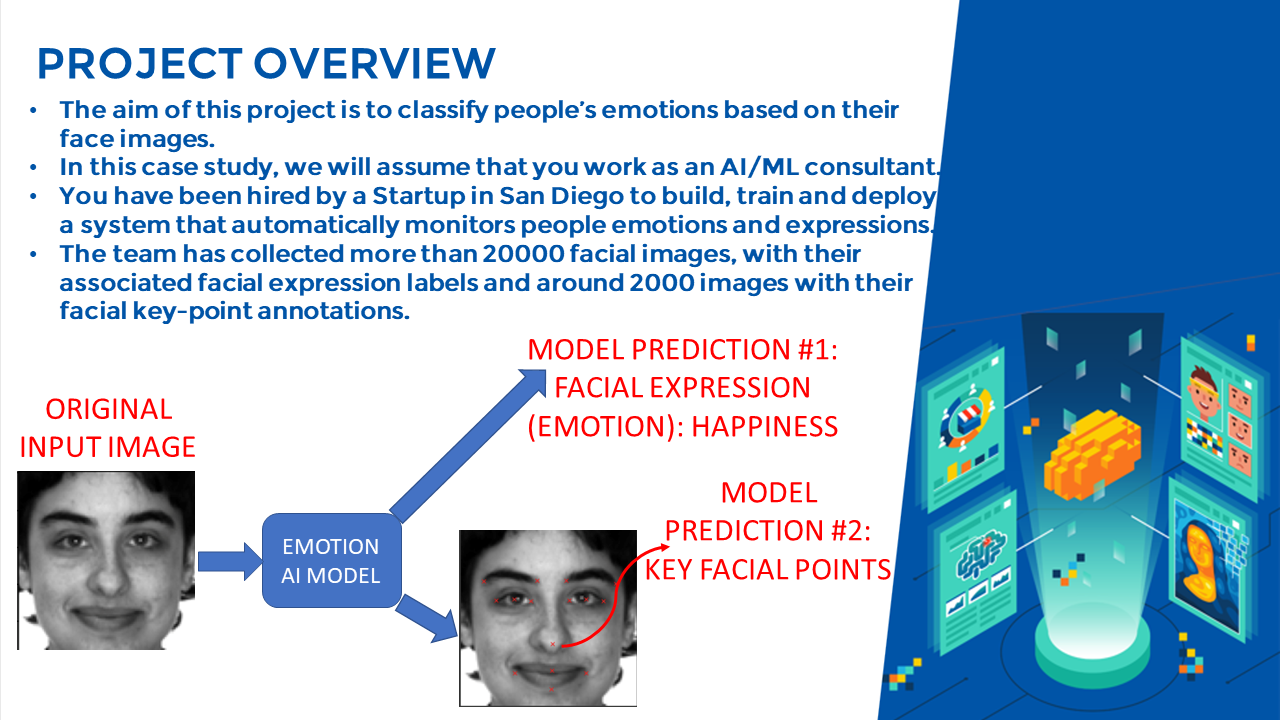
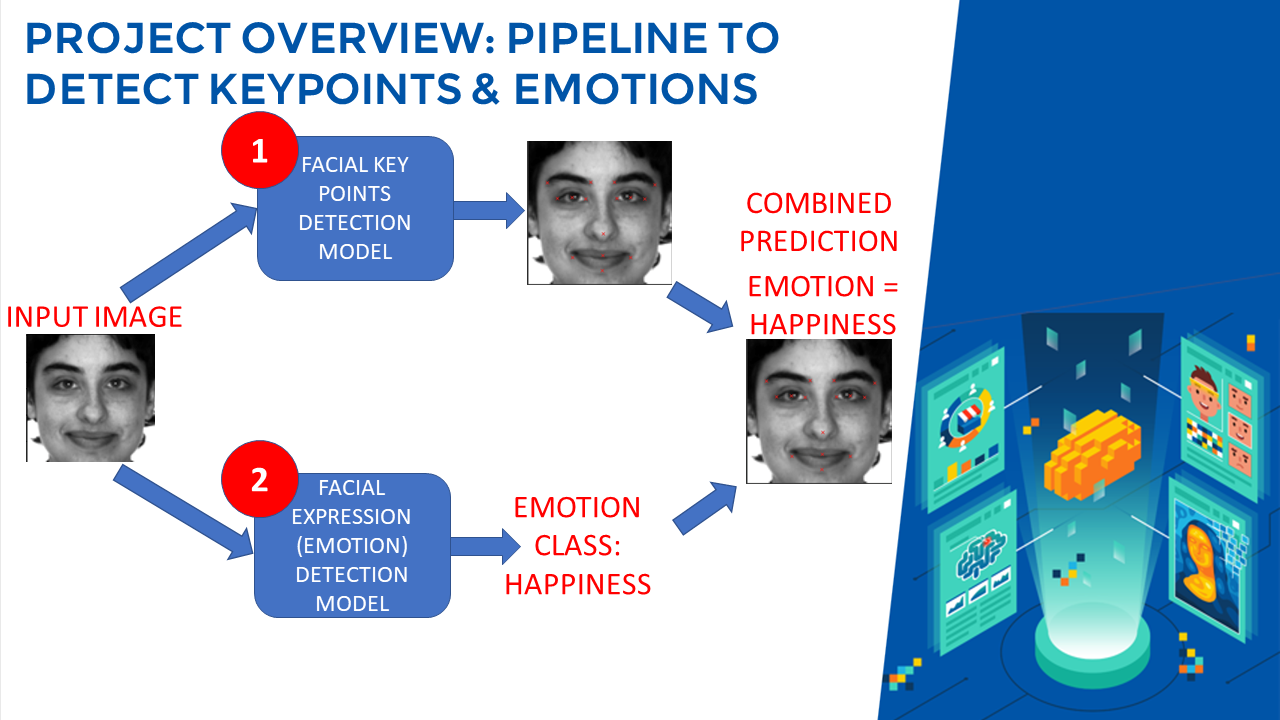

## 2) Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\tensorflow\pyth

Using TensorFlow backend.


In [2]:
# load facial key points data
path = 'D:/David/Udemy/Modern AI 6 Projects/Emotion AI/Emotion AI Dataset/data.csv'
keyfacial_df = pd.read_csv(path)

In [3]:
keyfacial_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [4]:
# Obtain relavant information about the dataframe
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Check if null values exist in the dataframe
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [6]:
# Image data contains pixels 

keyfacial_df['Image'].shape

(2140,)

In [7]:
# Because object type, (contains text), the shape is unknown (only detect rows)

keyfacial_df['Image'][0].shape

AttributeError: 'str' object has no attribute 'shape'

In [8]:
# Then, we need to change it to  numpy array, with space as separating point / separator
# Use np.fromstring to convert into 1D array, then convert again using reshape to change into 2D array (96x96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [9]:
keyfacial_df['Image'][0].shape

(96, 96)

MINI CHALLENGE #1:

Obtain the average, minimum and maximum values for 'right_eye_center_x'

In [10]:
print('AVG = ', np.average(keyfacial_df['right_eye_center_x']))
print('MIN = ', np.min(keyfacial_df['right_eye_center_x']))
print('MAX = ', np.max(keyfacial_df['right_eye_center_x']))

AVG =  29.640268564561495
MIN =  18.9226106286
MAX =  42.495171727


In [11]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

## 3) Image Visualization

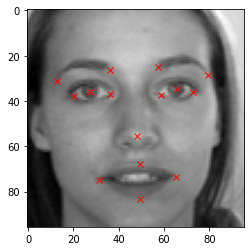

In [12]:
# Plot random image, (use random)
# For image, take from ['Image'], and use plt.imshow
# x and y keypoint values is in the columns... 
# but x values are in column 0,2,4 (even)
# and y values are in column 1,3,5 (odd)
# Then use .loc command to address them

i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap='gray')
for j in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[i][j-1],
            keyfacial_df.loc[i][j], 'rx')

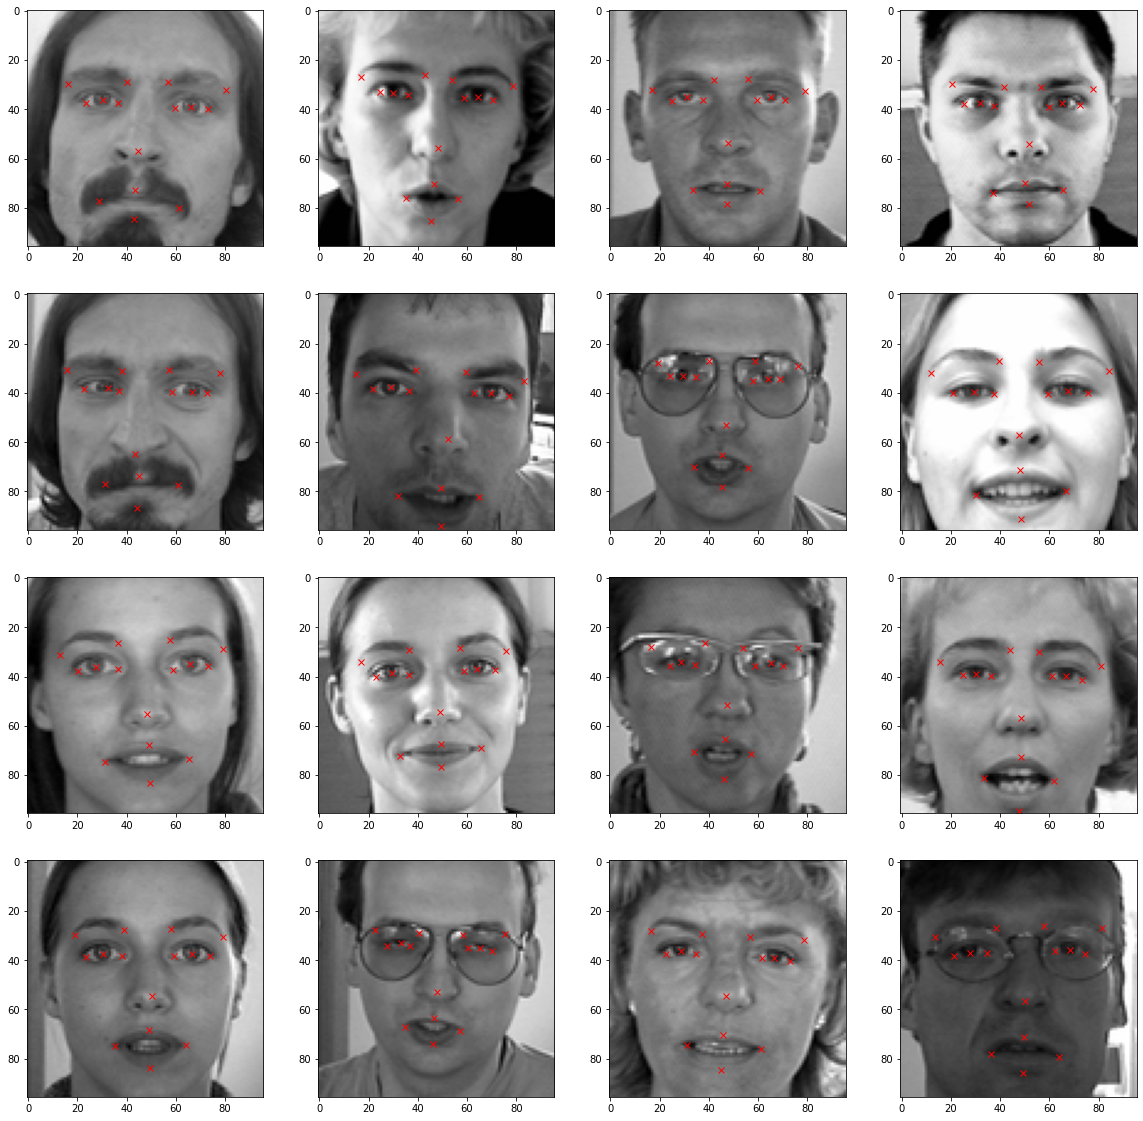

In [13]:
# Try to show more images in grid

fig = plt.figure(figsize=(20,20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    img = plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
    for j in range (1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1],
                keyfacial_df.loc[i][j], 'rx')

MINI CHALLENGE #2: 
- Perform a sanity check on the data by randomly visualizing 64 new images along with their cooresponding key points

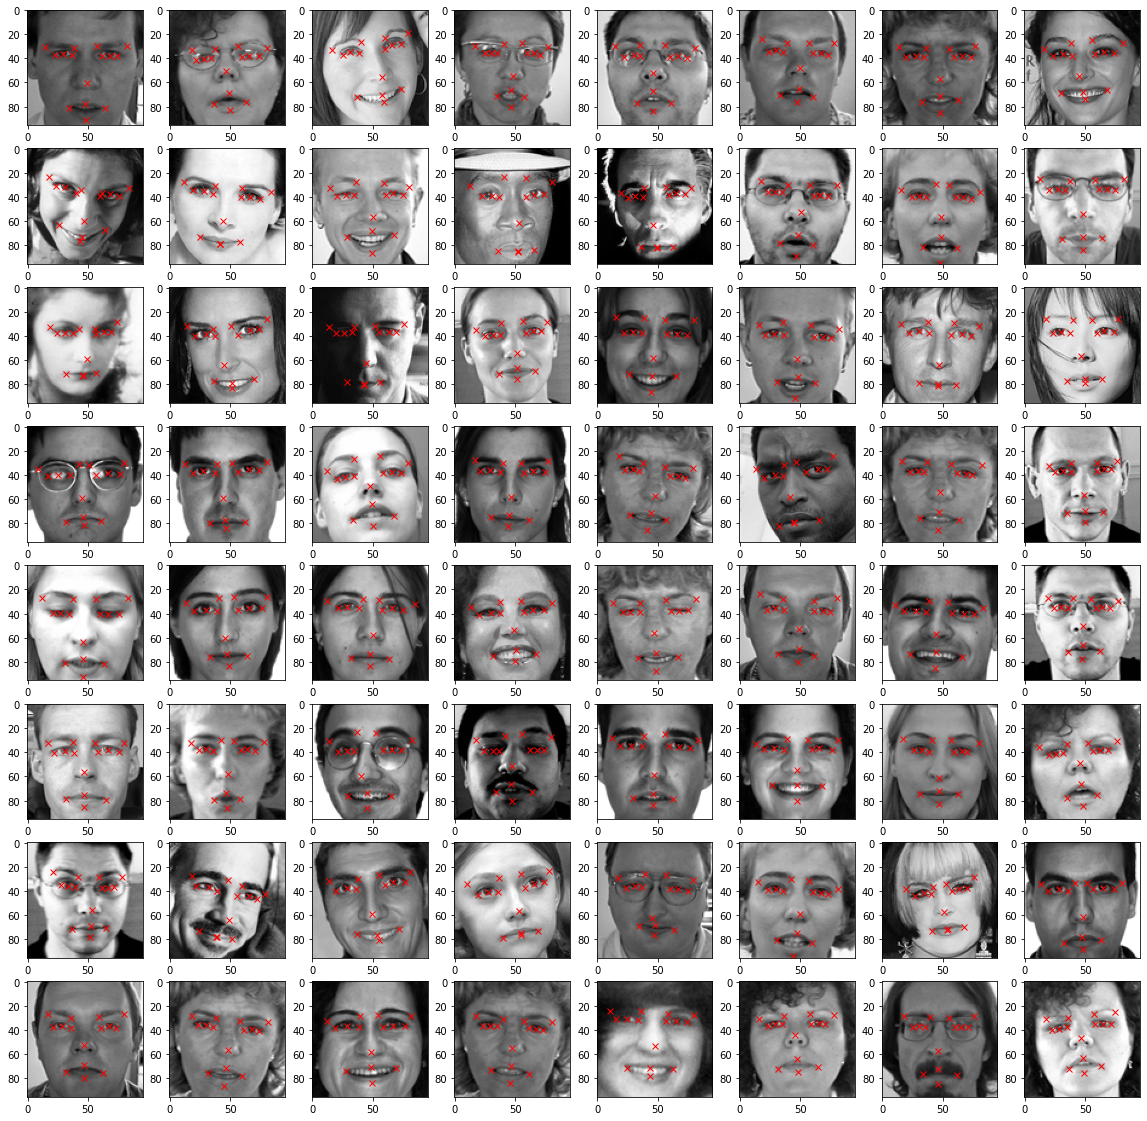

In [14]:
fig = plt.figure(figsize=(20,20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    random_row = np.random.randint(0, len(keyfacial_df))
    img = plt.imshow(keyfacial_df['Image'][random_row], cmap = 'gray')
    for j in range (1, 31, 2):
        plt.plot(keyfacial_df.loc[random_row][j-1],
                keyfacial_df.loc[random_row][j], 'rx')

## 4) Image Augmentation

In [15]:
keyfacial_df_copy = keyfacial_df.copy()

In [16]:
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [17]:
# Flip Horizontal, (flip by y axis)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

# Because flip horizontal, then y values will still same
# Only x values will change, then we have to substract pixel with x values
# x columns located in 0,2,4,... (even)

for i in range(len(columns)):
    if i % 2 == 0:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96 - x)

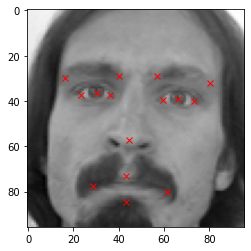

In [18]:
# Before after

# Original Image:
plt.imshow(keyfacial_df['Image'][0], cmap='gray')
for i in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[0][i-1],
            keyfacial_df.loc[0][i], 'rx')

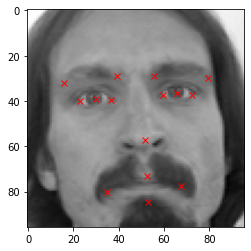

In [19]:
# Rotated Image:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for i in range(1, 31, 2):
    plt.plot(keyfacial_df_copy.loc[0][i-1],
            keyfacial_df_copy.loc[0][i], 'rx')

In [20]:
# Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [21]:
augmented_df.shape

(4280, 31)

In [22]:
# Next Augmentation: Increase the brightness
# How? Multiply pixels by between 1.2 and 2
# Clip the value between 0 to 255

keyfacial_df_copy = keyfacial_df.copy()
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.clip((np.random.uniform(1.2, 2) * x), 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

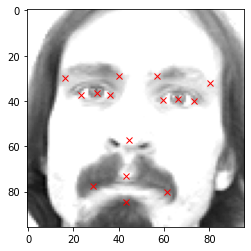

In [23]:
# Example of increased brightness

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for i in range(1, 31, 2):
    plt.plot(keyfacial_df_copy.loc[0][i-1],
            keyfacial_df_copy.loc[0][i],
            'rx')

MINI CHALLENGE #3:

Augment images by flipping them vertically (Hint: Flip along x-axis and note that if we are flipping along x-axis, x co-ordinates won't change)

In [24]:
keyfacial_df_copy = keyfacial_df.copy()
columns = keyfacial_df_copy.columns[:-1]

keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=0))

for i in range(len(columns)):
    if i % 2 != 0:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96 - x)

MINI CHALLENGE #4:
- Perform a sanity check and visualize sample images

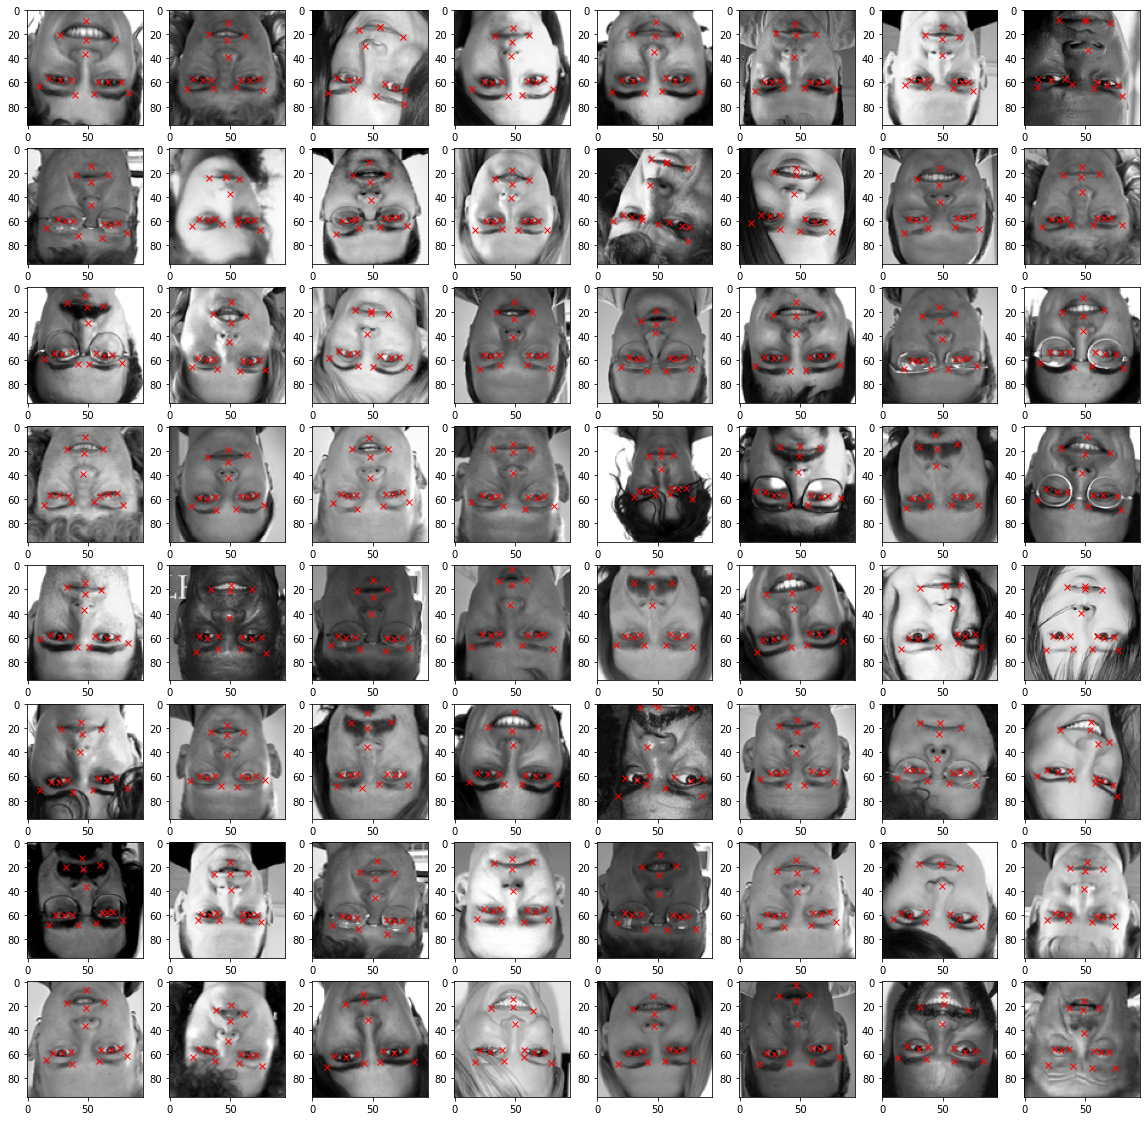

In [25]:
fig = plt.figure(figsize=(20,20))

for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    random_row = np.random.randint(0, len(keyfacial_df_copy))
    img = plt.imshow(keyfacial_df_copy['Image'][random_row], 
                    cmap = 'gray')
    for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[random_row][j-1],
                keyfacial_df_copy.loc[random_row][j],
                'rx')

## 5) Data Normalization and Train Data Preparation

In [26]:
# Obtain the image values located in last column
img = augmented_df[:,30]

# Normalize
img = img/255

len(img)

6420

In [27]:
# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [28]:
# Obtain the value of x & y coordinates which are to used as target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [29]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

MINI CHALLENGE #5: 
- Try a different value for 'test_size' and verify that the split was successful

In [30]:
X_test.shape

(1284, 96, 96, 1)

MINI CHALLENGE #6: 
- List at least 3 types of activation functions, which type is preferred in the hidden layers?

Answer:
- Rectified Linear Activation (RELU)
- Logistic (Sigmoid)
- Hyperbolic Tangent (Tanh)

Rectified Linear Activation (RELU) is more preferred

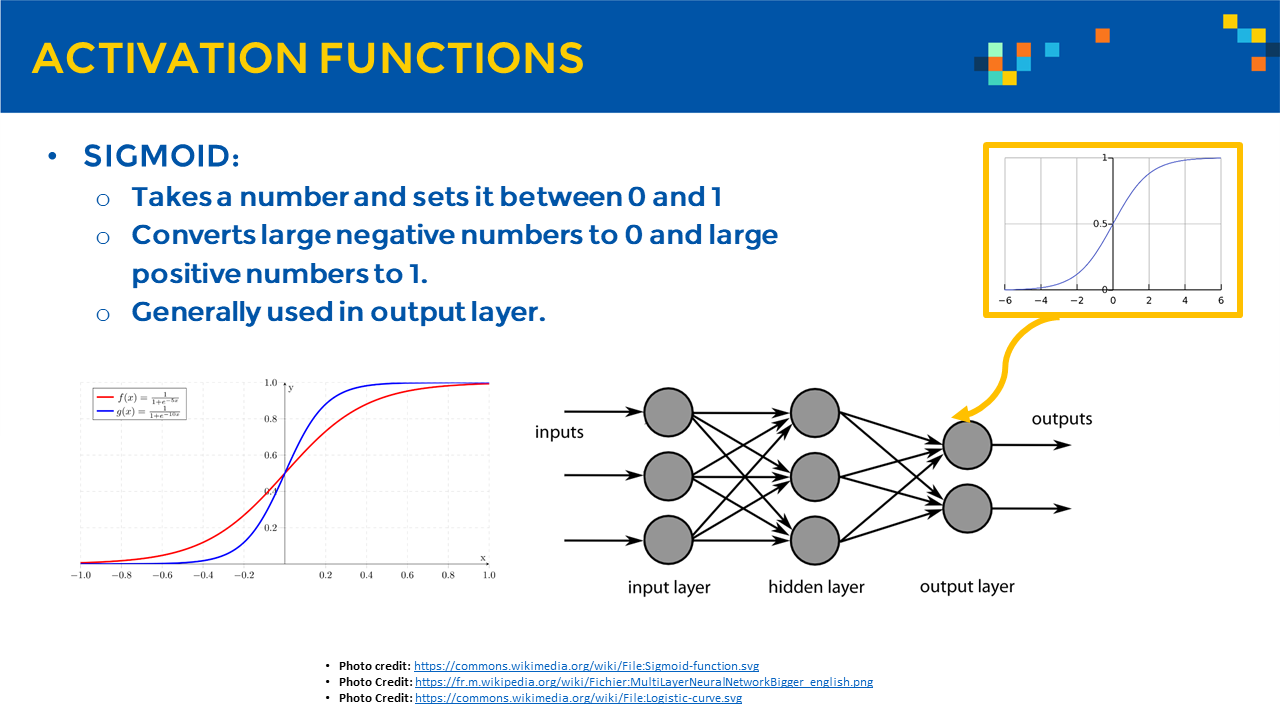
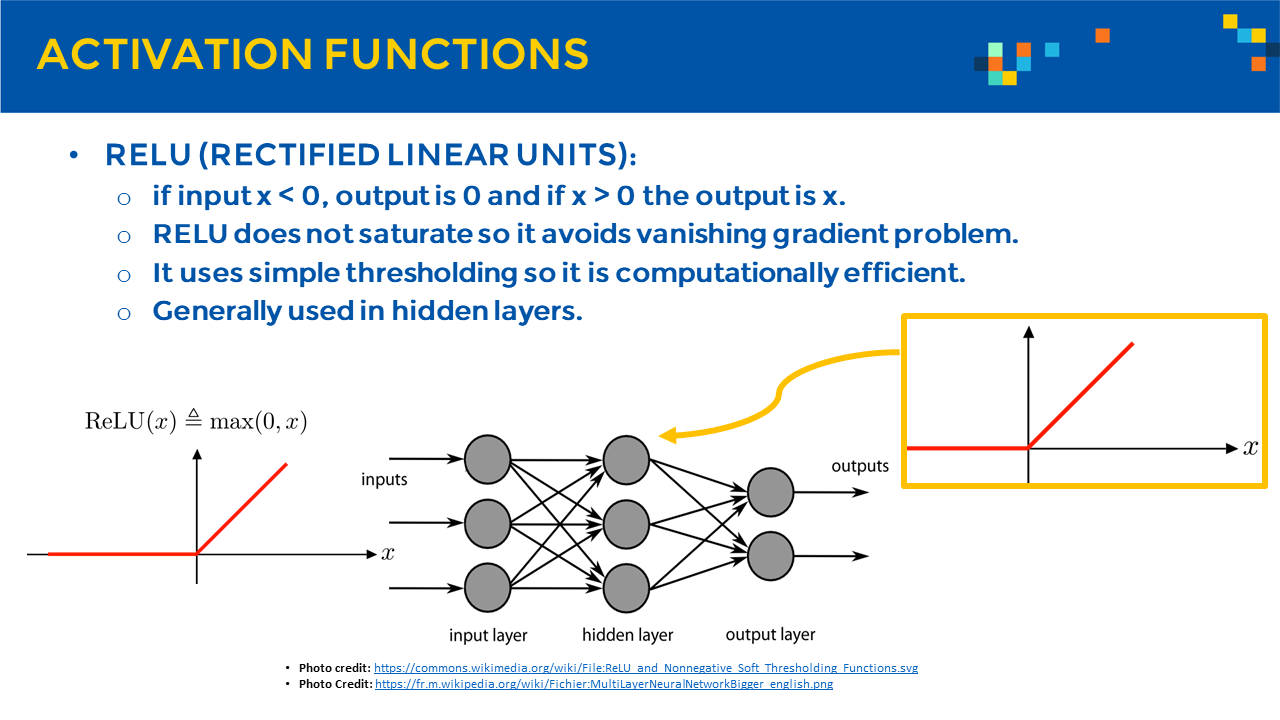
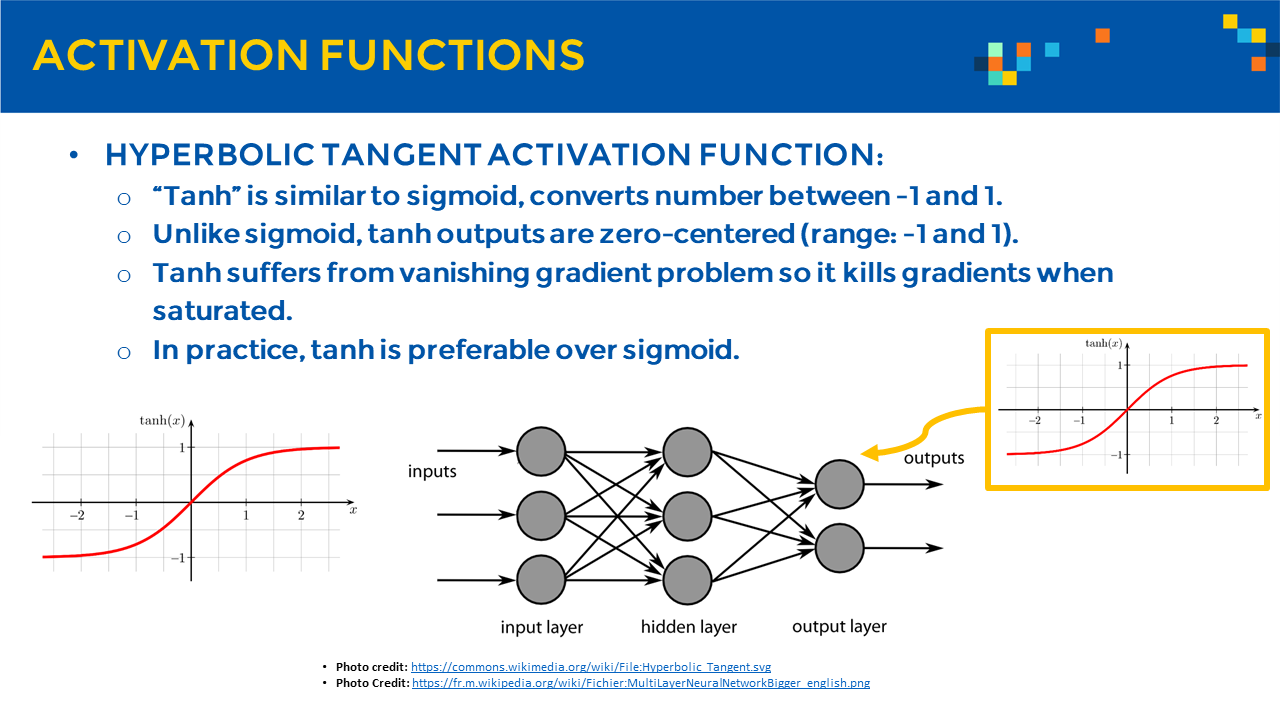

MINI CHALLENGE #7: 
- List at least 3 different neural networks architectures and their applications. 

Answer: 
- Artificial Neural Network (for tabular data)
- Recurrent Neural Network (for Sequence data such as time series, text, audio)
- Convolutional Neural Network (for image and video)

## 6) Building Residual Neural Network Key facial Points

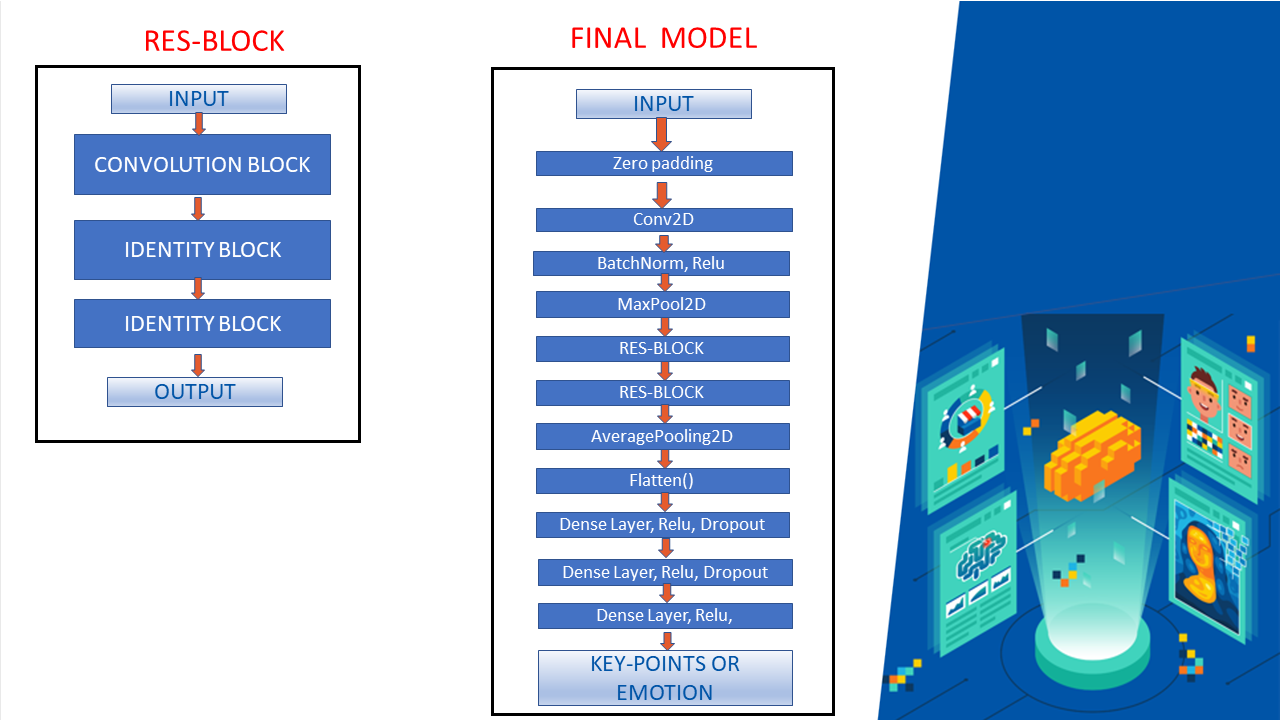
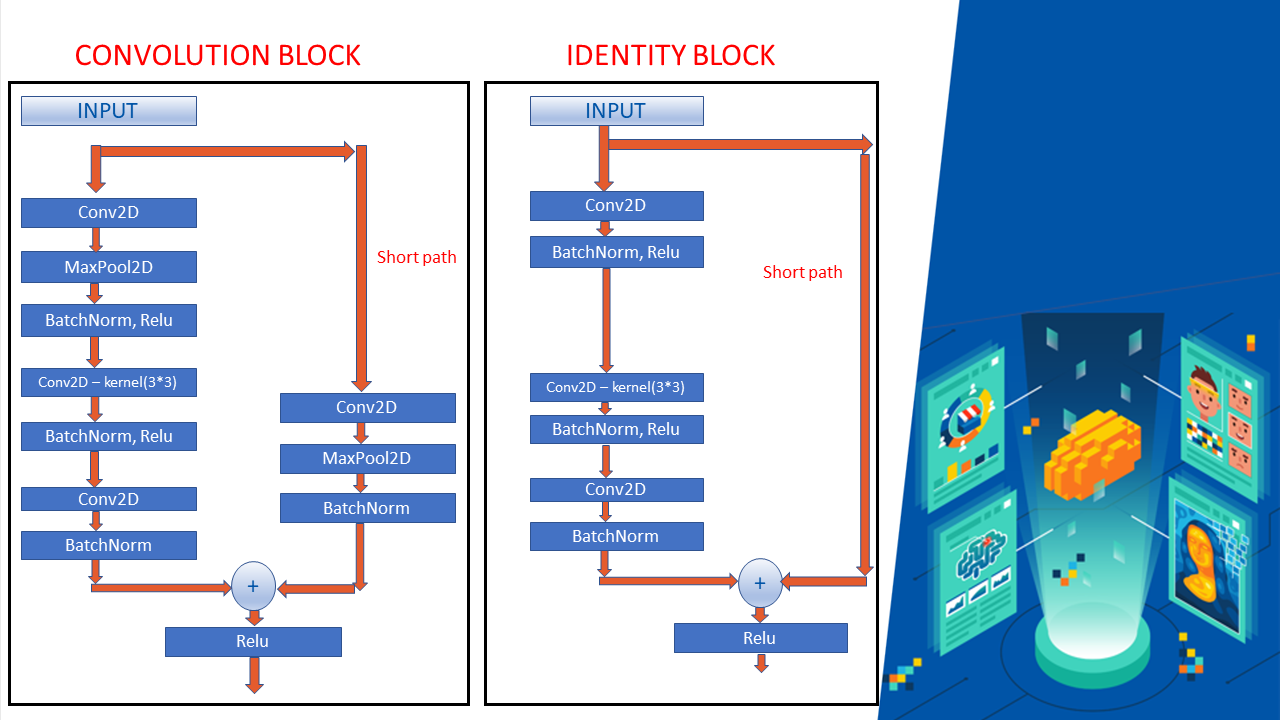

In [78]:
def res_block(X, filter, stage):
    
    # Convolutional_block
    X_copy = X

    f1 , f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [32]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0

## 7) Compile and train Key Facial Points Detection Deep Learning Model

In [37]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])
# Check this out for more information on Adam optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [38]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [39]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 24, epochs =4, validation_split = 0.1, callbacks=[checkpointer])

Train on 4622 samples, validate on 514 samples
Epoch 1/4
4608/4622 [============================>.] - ETA: 0s - loss: 52.2808 - acc: 0.6035
Epoch 00001: val_loss improved from inf to 50.08624, saving model to FacialKeyPoints_weights.hdf5
4622/4622 [==============================] - 271s 59ms/sample - loss: 52.8134 - acc: 0.6028 - val_loss: 50.0862 - val_acc: 0.6790
Epoch 2/4
4608/4622 [============================>.] - ETA: 0s - loss: 38.3089 - acc: 0.6107
Epoch 00002: val_loss did not improve from 50.08624
4622/4622 [==============================] - 259s 56ms/sample - loss: 38.4513 - acc: 0.6110 - val_loss: 66.4404 - val_acc: 0.6673
Epoch 3/4
4608/4622 [============================>.] - ETA: 0s - loss: 32.2693 - acc: 0.6122
Epoch 00003: val_loss did not improve from 50.08624
4622/4622 [==============================] - 258s 56ms/sample - loss: 32.2109 - acc: 0.6121 - val_loss: 75.0827 - val_acc: 0.6751
Epoch 4/4
4608/4622 [============================>.] - ETA: 0s - loss: 31.2361 - a

In [31]:
# save the model architecture to json file for future use

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
    json_file.write(model_json)

NameError: name 'model_1_facialKeyPoints' is not defined

MINI CHALLENGE #11:
- Experiment with changing the batch size and validation split value and retrain the model (Take Home)

## 8) Assess Performacne

In [32]:
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
# Evaluate the model

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

1284/1284 [==============================] - 8s 6ms/sample - loss: 43.4406 - acc: 0.7017
Accuracy : 0.7017133831977844


In [34]:
# Get the model keys 
history.history.keys()

NameError: name 'history' is not defined

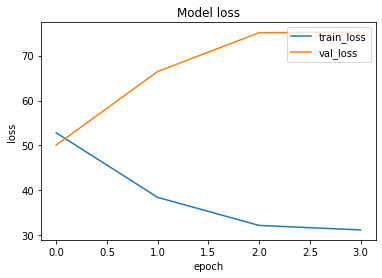

In [41]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Classify emotions using Convolutional Neural Network
In part 2, will make Classification problem

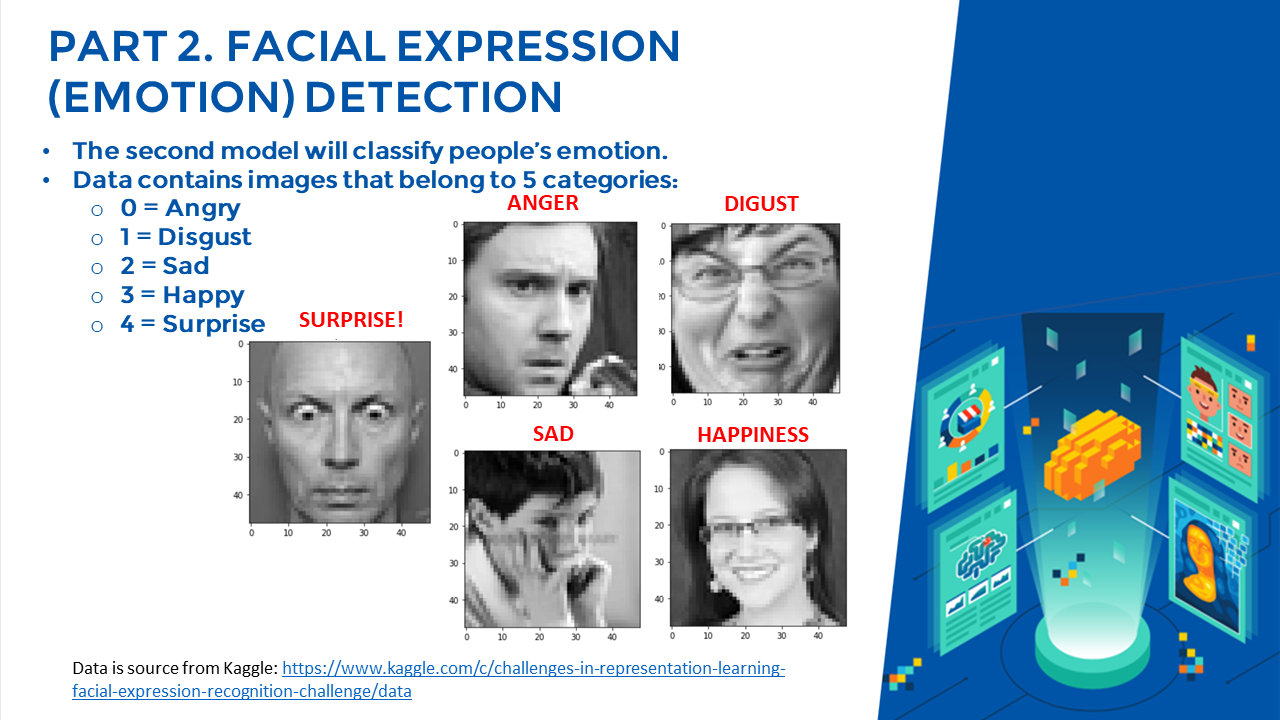
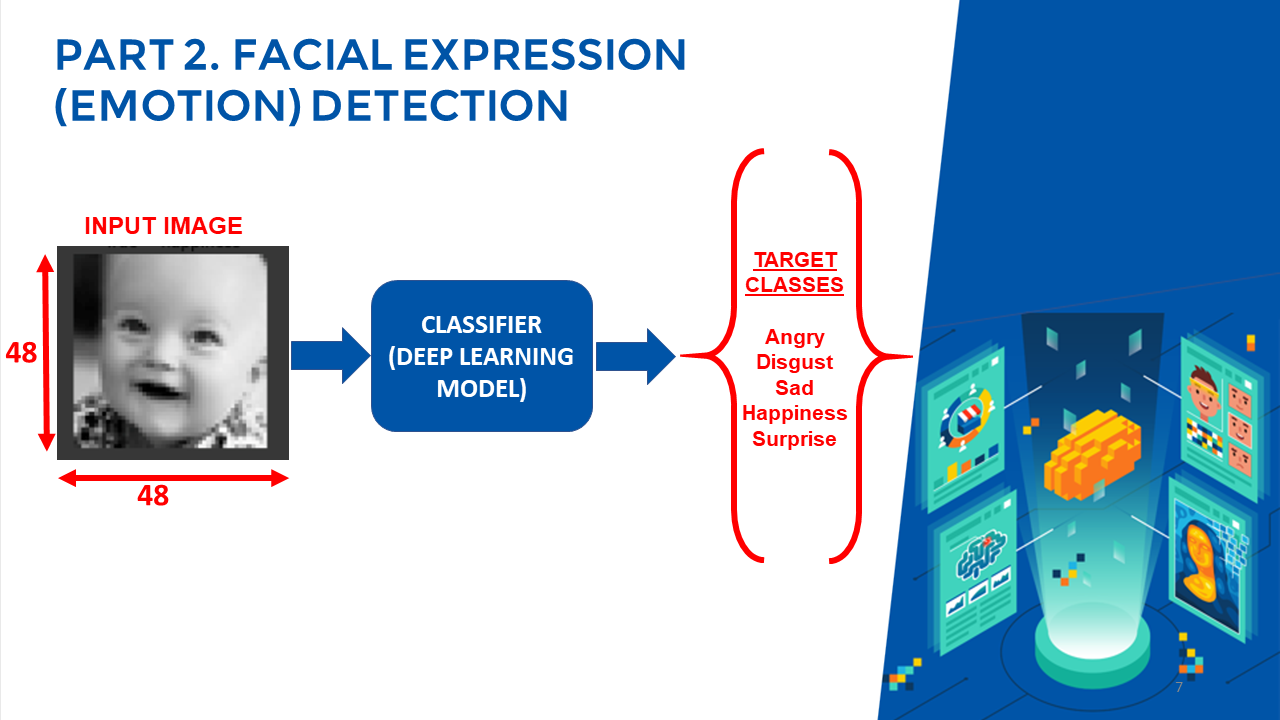

## 9) Load Face Expression Data

In [35]:
# load Image Data for facial Expressions
path2 = 'D:/David/Udemy/Modern AI 6 Projects/Emotion AI/Emotion AI Dataset/icml_face_data.csv'
facialexpression_df = pd.read_csv(path2)

In [36]:
facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [36]:
facialexpression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1    pixels  24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


In [37]:
# For change the string into numpy array

def string2array(x):
    return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [38]:
# Resize images from (48, 48) to (96, 96)

def resize(x):
  
    img = x.reshape(48, 48)
    return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [39]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [40]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [41]:
facialexpression_df

emotion                                             pixels
0            0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1            0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2            2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3            2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4            3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...
...        ...                                                ...
24563        3  [[-4.901001, 5.6496277, 22.477203, 49.366516, ...
24564        0  [[181.71645, 179.72063, 176.40785, 175.93037, ...
24565        3  [[178.1166, 176.83118, 174.74146, 172.61276, 1...
24566        0  [[16.883408, 16.953583, 17.081573, 16.53476, 1...
24567        3  [[30.199814, 29.574478, 28.545822, 27.846603, ...

[24568 rows x 2 columns]

In [42]:
facialexpression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1    pixels  24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


In [43]:
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

## 10) Visualize Image

In [44]:
label_to_text = {0: 'anger',
                1: 'disgust',
                2: 'sad',
                3: 'happiness',
                4: 'surprise'}

MINI CHALLENGE #12: 
- Visualize the first image in the dataframe and make sure that the image is not distorted by resizing or reshaping operations

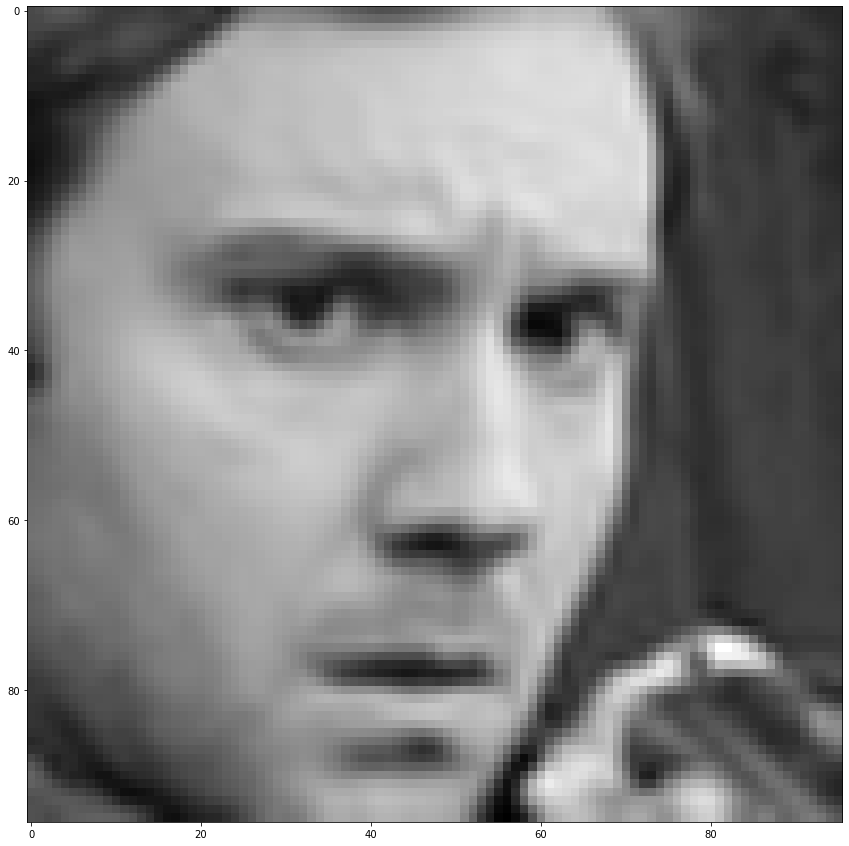

In [45]:
plt.figure(figsize=(15,15))

plt.imshow(facialexpression_df[' pixels'][0],
          cmap = 'gray')

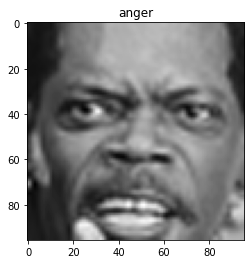

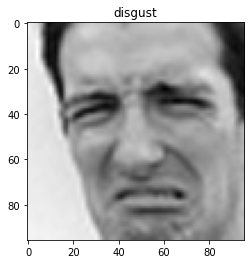

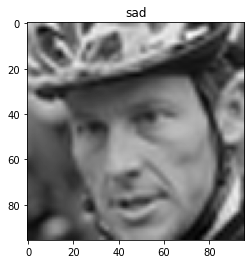

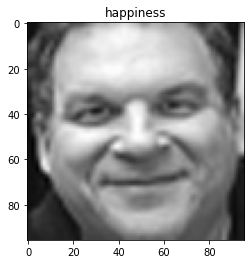

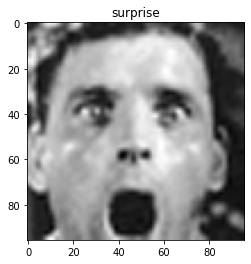

In [46]:
for i in label_to_text.keys():
    data = facialexpression_df[facialexpression_df['emotion'] == i][2:3]
    img = data[' pixels'].item()
    img = img.reshape(96,96)
    plt.figure()
    plt.title(label_to_text[i])
    plt.imshow(img, cmap = 'gray')

<AxesSubplot:ylabel='emotion'>

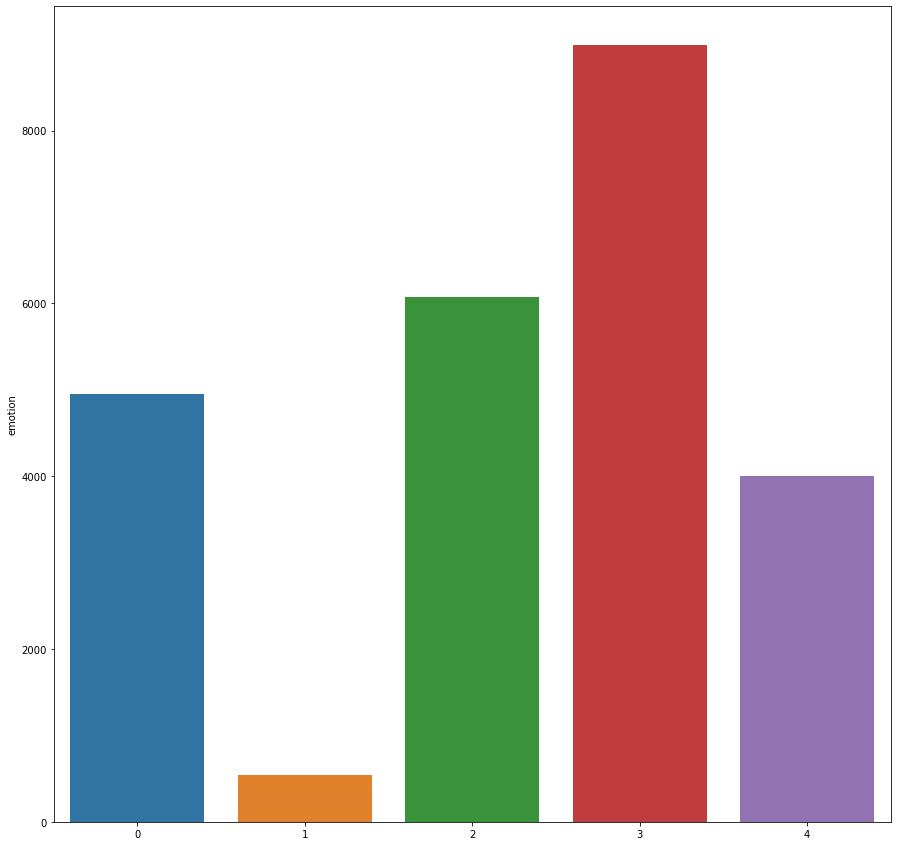

In [47]:
plt.figure(figsize=(15,15))
sns.barplot(data= facialexpression_df, x=facialexpression_df.emotion.value_counts().index, y=facialexpression_df['emotion'].value_counts())

From that graph, we got information that image with expression no.1 (disgust) is too few. We have to augment the disgust image

## 11) Data Preparation and Image Augmentation

In [48]:
# Split into X and y

X = facialexpression_df[' pixels']

# y is categorical, but lets use keras.to_categorical

from keras.utils import to_categorical
y = to_categorical(facialexpression_df['emotion'])

In [49]:
X

0        [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...
                               ...                        
24563    [[-4.901001, 5.6496277, 22.477203, 49.366516, ...
24564    [[181.71645, 179.72063, 176.40785, 175.93037, ...
24565    [[178.1166, 176.83118, 174.74146, 172.61276, 1...
24566    [[16.883408, 16.953583, 17.081573, 16.53476, 1...
24567    [[30.199814, 29.574478, 28.545822, 27.846603, ...
Name:  pixels, Length: 24568, dtype: object

In [50]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [51]:
X.shape

(24568,)

In [52]:
# Because X don't have it's shape, lets reshape it into array, and make it 96x96

X = np.stack(X, axis=0)
X = X.reshape(24568, 96, 96, 1)

In [53]:
X.shape

(24568, 96, 96, 1)

In [54]:
# Image Normalization
X = X/255
X

array([[[[ 2.71831065e-01],
         [ 2.86426067e-01],
         [ 3.10341924e-01],
         ...,
         [ 1.59749761e-01],
         [ 1.59444705e-01],
         [ 1.58978030e-01]],

        [[ 2.69267648e-01],
         [ 2.78244078e-01],
         [ 2.93010503e-01],
         ...,
         [ 1.69704959e-01],
         [ 1.64851710e-01],
         [ 1.61661252e-01]],

        [[ 2.65760064e-01],
         [ 2.65554756e-01],
         [ 2.65379310e-01],
         ...,
         [ 1.85861692e-01],
         [ 1.73581526e-01],
         [ 1.65939808e-01]],

        ...,

        [[ 2.93687105e-01],
         [ 3.01158965e-01],
         [ 3.13343495e-01],
         ...,
         [ 2.80248731e-01],
         [ 2.32661769e-01],
         [ 2.02930823e-01]],

        [[ 3.00710827e-01],
         [ 2.97286689e-01],
         [ 2.91194171e-01],
         ...,
         [ 3.68405402e-01],
         [ 3.12860161e-01],
         [ 2.78950840e-01]],

        [[ 3.04465026e-01],
         [ 2.94708788e-01],
         [

In [55]:
# Split into train, test, and Validation

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

In [56]:
# Create a Image Generator using Keras

train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.4, 1.8],
    fill_mode = "nearest")

## 12) Build and Train Deep Learning Model for Facial Expression Classification

In [91]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 3 - stage
#X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, 102, 102, 1)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [94]:
# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [89]:
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [95]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
                              validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
                              epochs= 2, callbacks=[checkpointer, earlystopping])

Epoch 1/2
344/345 [============================>.] - ETA: 5s - loss: 1.3300 - acc: 0.4365 
Epoch 00001: val_loss improved from inf to 1.51813, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 1992s 6s/step - loss: 1.3295 - acc: 0.4366 - val_loss: 1.5181 - val_acc: 0.3599
Epoch 2/2
344/345 [============================>.] - ETA: 5s - loss: 1.0915 - acc: 0.5539 
Epoch 00002: val_loss did not improve from 1.51813
345/345 [==============================] - 2050s 6s/step - loss: 1.0911 - acc: 0.5540 - val_loss: 1.7114 - val_acc: 0.2142


In [89]:
# saving the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
    json_file.write(model_json)

## 13) Assess the performance of the model 

In [57]:
with open('FacialExpression-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('FacialExpression_weights.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [58]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

1229/1229 [==============================] - 8s 6ms/sample - loss: 1.5496 - acc: 0.3702
Test Accuracy: 0.3702196776866913


In [98]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [99]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

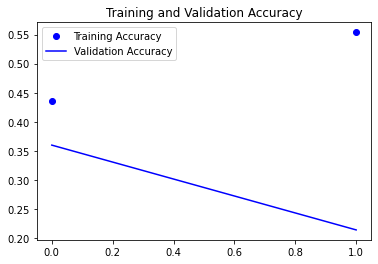

In [100]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

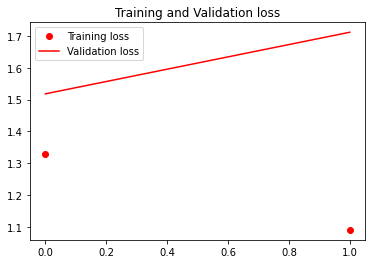

In [101]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [102]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

In [103]:
y_true.shape

(1229,)

<AxesSubplot:>

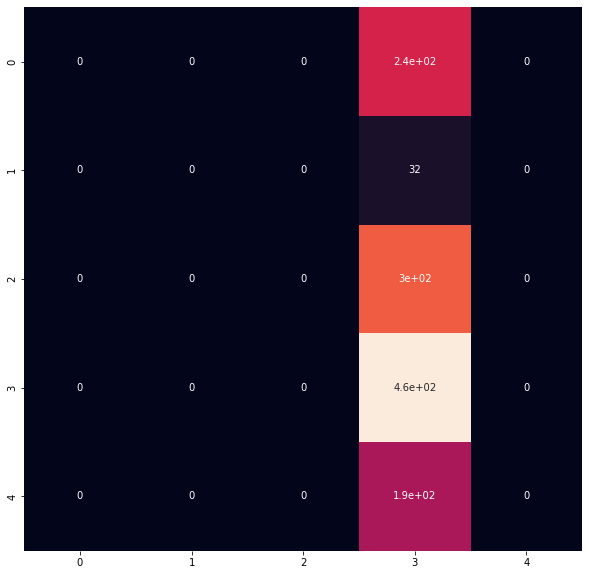

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

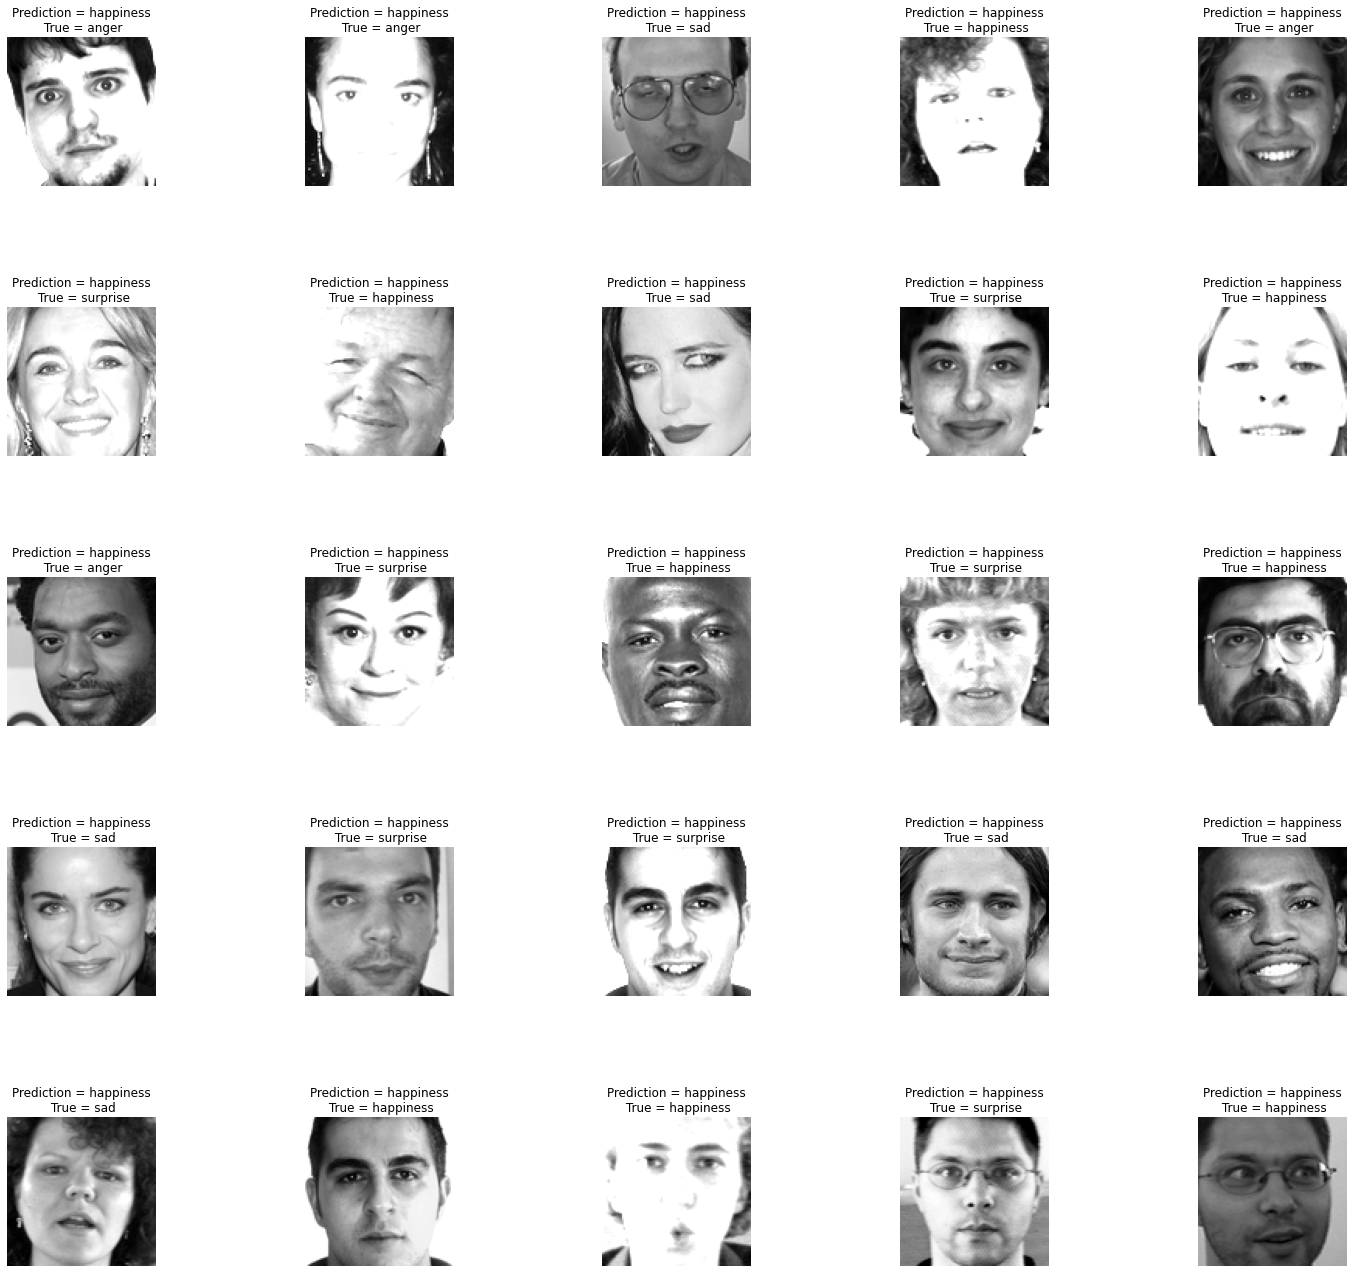

In [105]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00       302
           3       0.37      1.00      0.54       458
           4       0.00      0.00      0.00       194

    accuracy                           0.37      1229
   macro avg       0.07      0.20      0.11      1229
weighted avg       0.14      0.37      0.20      1229



C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\David Yohast\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Combine Both Model
## 14) Combine Key Facial Detection and Emotion Detection

In [59]:
def predict(X_test):

    # Making prediction from the keypoint model
    df_predict = model_1_facialKeyPoints.predict(X_test)

    # Making prediction from the emotion model
    df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

    # Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

    # Converting the predictions into a dataframe
    df_predict = pd.DataFrame(df_predict, columns= columns)

    # Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion

    return df_predict

In [60]:
df_predict = predict(X_test)

In [61]:
df_predict

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             62.771240          36.144737           31.694246   
1             61.293449          36.335613           32.528847   
2             35.526505          35.900158           58.303661   
3             35.649864          38.028976           59.178009   
4             62.845169          35.565563           30.170717   
...                 ...                ...                 ...   
1279          30.726849          35.249657           62.383984   
1280          62.476204          36.010078           31.288794   
1281          64.636253          37.109436           30.447149   
1282          61.844063          36.869362           33.762905   
1283          33.274994          36.770336           63.779240   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.089230                57.266209                37.144215   
1              36.456825                55.785374                37.499817   
2              35.345268                39.653870                37.643700   
3              36.665760                40.432453                38.629463   
4              37.390659                55.601070                37.783482   
...                  ...                      ...                      ...   
1279           35.023449                35.947041                36.893024   
1280           35.778610                57.142193                37.420013   
1281           36.905979                58.545712                37.871231   
1282           36.662502                56.378815                38.428230   
1283           36.778172                38.712532                38.558113   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   67.587654                36.694885   
1                   66.096291                36.928783   
2                   30.385788                36.301517   
3                   30.880201                38.212883   
4                   69.677109                36.194138   
...                       ...                      ...   
1279                24.542900                36.262669   
1280                67.531830                36.911682   
1281                71.279839                36.880501   
1282                66.764404                37.251640   
1283                26.831238                37.422569   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.118389                 37.315998  ...   52.042271   
1                    37.017654                 37.599628  ...   55.455822   
2                    53.816780                 36.601822  ...   55.489574   
3                    54.620934                 37.106113  ...   57.322468   
4                    36.565556                 38.347054  ...   54.906963   
...                        ...                       ...  ...         ...   
1279                 56.945259                 35.999451  ...   52.230595   
1280                 35.449841                 37.107517  ...   53.180725   
1281                 36.223316                 37.641712  ...   54.666359   
1282                 37.925179                 38.656101  ...   54.803574   
1283                 57.637039                 38.141048  ...   53.664783   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               59.783188            73.687691             36.754875   
1               58.471420            75.217010             35.636078   
2               35.975548            73.590157             57.072258   
3               38.468750            76.641228             58.623589   
4               61.698662            73.746452             34.063309   
...                   ...                  ...                   ...   
1279            34.018284            72.029358             60.762360   
1280            59.129925            73.123238             35.153843   
1281  

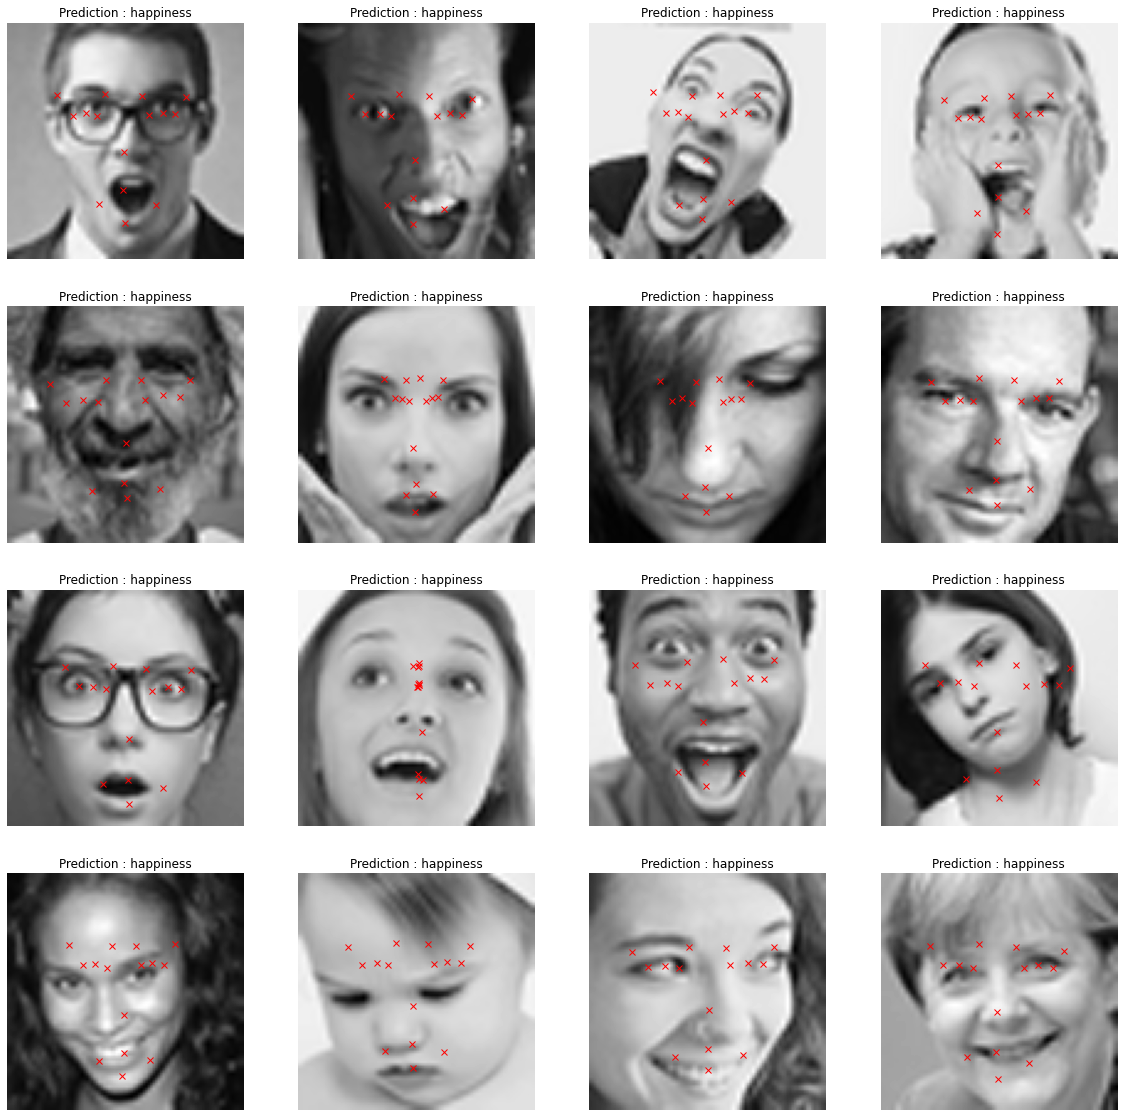

In [62]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
ax = ax.ravel()

for i in range(16):
    ax[i].imshow(X_Test[i].squeeze(),
                cmap = 'gray')
    ax[i].set_title('Prediction : {}'.format(label_to_text[df_predict['emotion'][i]]))
    ax[i].axis('off')
    for j in range(1,31,2):
        ax[i].plot(df_predict.loc[i][j-1],
                  df_predict.loc[i][j],
                  'rx')

# Model Deployment
## 15) Save the Model

In [63]:
import os

In [64]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
    MODEL_DIR = directory
    version = 1 

    # Let's join the temp model directory with our chosen version number 
    # The expected result will be = '\tmp\version number'
    export_path = os.path.join(MODEL_DIR, str(version))
    print('export_path = {}\n'.format(export_path))

    # Let's save the model using saved_model.save
    # If the directory already exists, we will remove it using '!rm' 
    # rm removes each file specified on the command line. 

    if os.path.isdir(export_path):
        print('\nAlready saved a model, cleaning up\n')
        !rm -r {export_path}

    tf.saved_model.save(model, export_path)

    os.environ["MODEL_DIR"] = MODEL_DIR